# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [3]:
online_rt = pd.read_csv("Online_Retail.csv",encoding='latin1', sep=',')

### Step 3. Assign it to a variable called online_rt

In [4]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [13]:
Country_Wise_Qty = online_rt.groupby('Country')[['Quantity']].sum().add_prefix('Total_').sort_values(by='Total_Quantity',ascending=False).reset_index()
Country_Wise_Qty 

,Country,Total_Quantity
0,United Kingdom,4733819
1,Netherlands,200937
2,EIRE,147447
3,Germany,119263
4,France,112104
5,Australia,84209
6,Sweden,36083
7,Switzerland,30630
8,Spain,27951
9,Japan,26016


In [14]:
countries = Country_Wise_Qty.iloc[1:11,:]
countries

,Country,Total_Quantity
1,Netherlands,200937
2,EIRE,147447
3,Germany,119263
4,France,112104
5,Australia,84209
6,Sweden,36083
7,Switzerland,30630
8,Spain,27951
9,Japan,26016
10,Belgium,23237


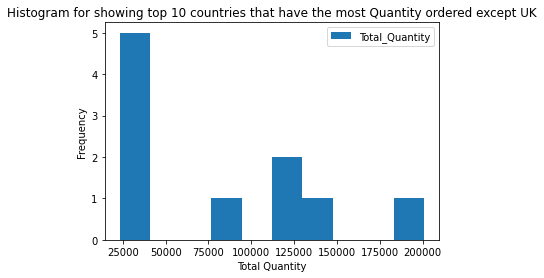

In [16]:
countries.plot(kind='hist')
plt.title('Histogram for showing top 10 countries that have the most Quantity ordered except UK')
plt.xlabel('Total Quantity')
plt.show()

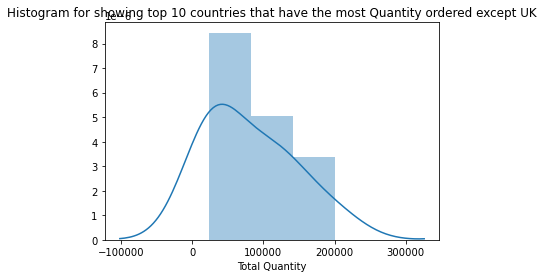

In [17]:
sns.distplot(countries.Total_Quantity)
plt.title('Histogram for showing top 10 countries that have the most Quantity ordered except UK')
plt.xlabel('Total Quantity')
plt.show()

### Step 5.  Exclude negative Quantity entries

In [18]:
neg_entries = online_rt.loc[online_rt.Quantity<0].index

In [19]:
online_rt.drop(index=neg_entries,inplace=True)

In [9]:
online_rt.shape

(531285, 8)

In [20]:
online_rt.loc[online_rt.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [21]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [17]:
neg_entries_price = online_rt.loc[online_rt.UnitPrice<0].index

In [18]:
online_rt.drop(index=neg_entries_price,inplace=True)

In [19]:
online_rt.loc[online_rt.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

purpose is to know for which customers -- if qty in increasing then unit price is falling and vice versa

In [50]:
# Step1: Grouping by Countries:

res1 = online_rt.groupby(['CustomerID','Country']).sum().add_prefix('Total_')

# Step2: Filter for positive Unit Price and sorting in descending order

res1 = res1[res1.Total_UnitPrice >0 ].sort_values(by= ['Total_Quantity', 'Total_UnitPrice'],ascending=[False,False]).reset_index()
res1.head()

# Step 3: Extract top 3 Countries out of res1

Top_3 = res1.head(3)
Top_3

,CustomerID,Country,Total_Quantity,Total_UnitPrice
0,14646.0,Netherlands,197491,5176.09
1,16446.0,United Kingdom,80997,4.98
2,14911.0,EIRE,80515,26185.72


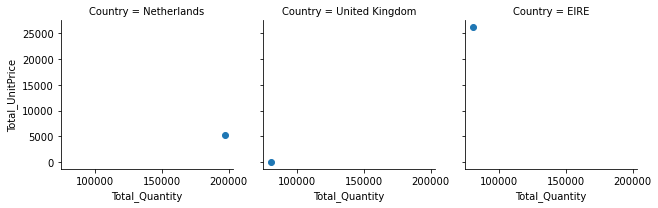

In [53]:
# To Plot for each of the 3 Countries, using FacetGrid graph

g = sns.FacetGrid(data=Top_3, col='Country')

g = g.map(plt.scatter,'Total_Quantity', 'Total_UnitPrice')
g.add_legend()
plt.show()